# Support Vector Machines
You should build a machine learning pipeline using a support vector machine model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.svm
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
df.head(), df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


(      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0  31953      5       0       0       0       0       0       0       0   
 1  34452      8       0       0       0       0       0       0       0   
 2  60897      5       0       0       0       0       0       0       0   
 3  36953      0       0       0       0       0       0       0       0   
 4   1981      3       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel781  pixel782  pixel783  pixel784  
 0         0         

In [3]:
df = df.drop(columns=['id'])

x = df.drop(columns=['class'])
y = df['class']

print(x.shape)
print(y.shape)

(4000, 784)
(4000,)


In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

In [14]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}%\n")
print("Classification Report:\n", report)

Accuracy: 95.625%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       0.98      0.97      0.97        97
           2       0.95      0.95      0.95        78
           3       0.96      0.92      0.94        84
           4       0.91      0.97      0.94        74
           5       0.93      0.96      0.95        73
           6       0.99      0.97      0.98        78
           7       0.94      0.94      0.94        85
           8       0.99      0.93      0.96        83
           9       0.93      0.96      0.95        73

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



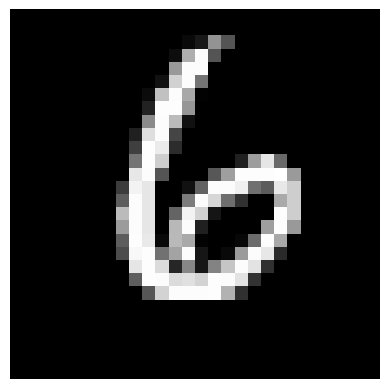

In [24]:
#index = np.random.choice(len(x_test), 1, replace=False)[0]
image = x_test[1].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()